(200,) (200,)


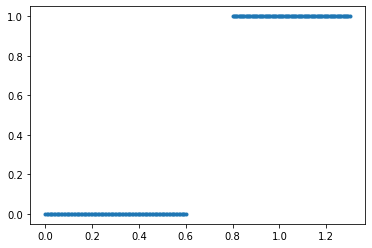

In [1]:
# logistic regression
import numpy as np
import matplotlib.pyplot as plt

# insert your code here
x1=np.linspace(0,0.6,100)
x2=np.linspace(0.8,1.3,100)
x=np.concatenate((x1,x2),axis=0)
y1=np.zeros((100,))
y2=np.ones((100,))
y=np.concatenate((y1,y2),axis=0)
print(x.shape,y.shape)
plt.plot(x,y,".")

In [2]:
class logis_regression:
  # Constructor
  def __init__(self, name='reg'):
    self.name = name  # Create an instance variable
  
  def logis(self,x,w_old):
    # insert your code here
    h=x.T @ w_old
    y_pred=np.clip(1/(1+np.exp(-h)),10**-20,0.9999999)
    op=y_pred

    return op

  def grad_update(self,w_old,lr,y,x):
    h=x.T @ w_old
    y_pred=np.clip(1/(1+np.exp(-h)),10**-20,0.9999999)
    w=w_old-lr*(np.sum((y_pred-y)*(x.T),axis=0,keepdims=True)/len(y)).T
    # insert your code here
    return w

  def error(self,w,y,x):
    h=x.T @ w
    y_pred=np.clip(1/(1+np.exp(-h)),10**-20,0.9999999)
    return -np.sum(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))/len(y)

    # by Gradien descent
  def Regression_grad_des(self,x,y,lr):
    m,n=x.shape
    w_prev=w=np.random.randn(m,1)
    err=[]
    for i in range(1000):
      # insert your code here
      err.append(self.error(w,y,x))
      w=self.grad_update(w,lr,y,x)
      dev=np.linalg.norm(w-w_prev)
      w_prev=w
      if dev<=10**(-20):
        break

    return w,err

In [3]:
# augmentation and data formating

x=x[:,np.newaxis]
y=y[:,np.newaxis]
x_aug=np.concatenate((np.ones((1,x.shape[0])), x.T),axis=0)
print(x_aug.shape,y.shape)



(2, 200) (200, 1)


[[-3.44894849]
 [ 5.29362123]]


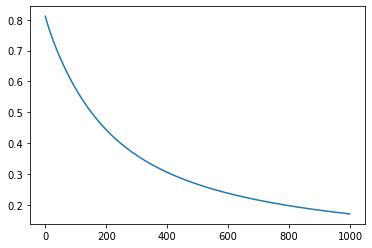

In [4]:
log_reg=logis_regression()
w_pred,err=log_reg.Regression_grad_des(x_aug,y,0.1)
print(w_pred)

plt.plot(err)

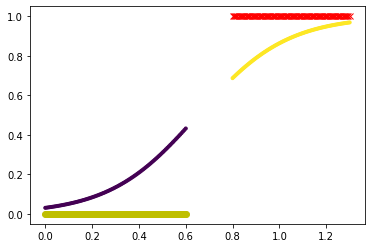

In [5]:
# output computation
# insert your code here
plt.plot(x1,np.zeros((x1).shape),'o',color='y')
plt.plot(x2,np.ones((x2).shape),'x',color='r')
h=x_aug.T @ w_pred
y_pred=np.clip(1/(1+np.exp(-h)),10**-20,0.9999999)
plt.scatter(x[:,0],y_pred,marker=".",c=y_pred>0.5)

## Classification of circularly separated data using logistic regression



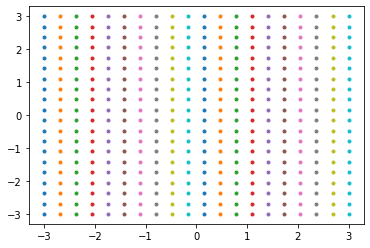

In [6]:
# Generating circularly separated data
import numpy as np
import matplotlib.pyplot as plt


x1=np.linspace(-3,3,20)
x2=np.linspace(-3,3,20)

x11,x22=np.meshgrid(x1,x2)
plt.plot(x11,x22,'.')


1. Circularly separated data generation

(400, 2)
(32, 2)
(332, 2)
(364, 2)


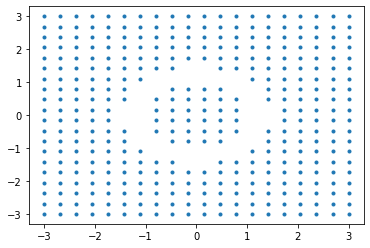

In [7]:
x1=x11.flatten()
x2=x22.flatten()

x=np.concatenate((x1[:,np.newaxis],x2[:,np.newaxis]),axis=1) # to make matrix format
print(x.shape)

aind=np.where((x[:,0]**(2)+x[:,1]**(2))<=0.9)

bind=np.where((x[:,0]**(2)+x[:,1]**(2))>=2.2)

x1=x[aind[0],:]
x2=x[bind[0],:]
print(x1.shape)
print(x2.shape)
x=np.concatenate((x1,x2))
print(x.shape)

plt.plot(x[:,0],x[:,1],'.')

As in case of circularly separated data, the boundary is nonlinear, so squred feature is taken.

(3, 364)


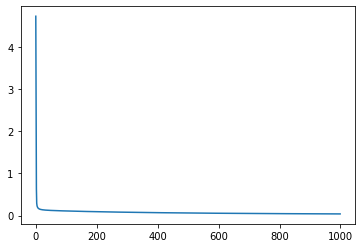

In [8]:
# perform logistic regression

y1=np.zeros((x1.shape[0]))
y2=np.ones((x2.shape[0]))
y=np.concatenate((y1,y2))

x_aug= np.concatenate((np.ones((1,x.shape[0])),(x**2).T),axis=0)# insert your code here    # squring to learn circular separation
print(x_aug.shape)

log_reg=logis_regression()
w_pred,err=log_reg.Regression_grad_des(x_aug,y[:,np.newaxis],0.1)
plt.plot(err)


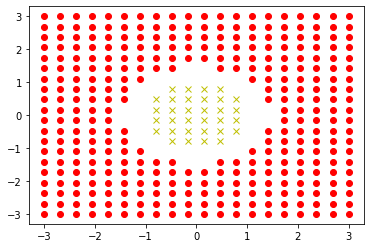

In [9]:
y_pred=log_reg.logis(x_aug,w_pred)

# insert your code here
ind1=np.where(y_pred<=0.5)
ind2=np.where(y_pred>0.5)
x00=x[ind1[0],:]
x11=x[ind2[0],:]

plt.figure()
plt.plot(x00[:,0],x00[:,1],'x',color='y')
plt.plot(x11[:,0],x11[:,1],'o',color='r')

## Multiclass logistic regression

1. Generate 1D data with 3 classes


### One vs rest classification

1. lets take polynomial of order 2 (by seeing the data distribution)

(300,)


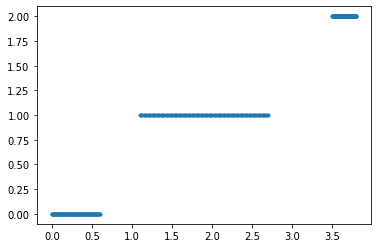

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x1=np.linspace(0,0.6,100)
x2=np.linspace(1.1,2.7,100)
x3=np.linspace(3.5,3.8,100)

x=np.concatenate((x1,x2,x3))
print(x.shape)

y1=np.zeros(x1.shape)
y2=np.ones(x2.shape)
y3=np.tile([2],x3.shape) # works same as zeros and ones but with any number

y=np.concatenate((y1,y2,y3))

plt.figure()
plt.plot(x,y,'.')


In [11]:
def data_transform(X,degree): 
  X_new=[]      
  for i in range(degree +1):
    X_new.append(X**i)              
  X_new = np.concatenate(X_new)  
  return X_new

In [12]:
x_aug=data_transform(x[np.newaxis,:],2)
print(x_aug.shape) # also includes biased term coefficient 1

(3, 300)


In [13]:
# plot for classification
def plot_op(x,y_pred):
  # insert your code here
  ind0=np.where(y_pred<=0.5)[0]
  ind1=np.where(y_pred>0.5)[0]

  x0=x[ind0,:]
  x1=x[ind1,:]


  plt.plot(x0,np.zeros((x0).shape),'o',color='y')
  plt.plot(x1,np.ones((x1).shape),'x',color='r')

[[-3.15670299]
 [ 0.29753718]
 [ 3.0563628 ]]


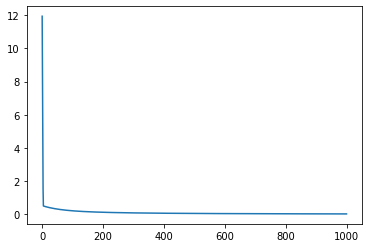

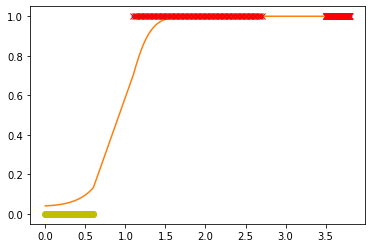

In [14]:
# take class 0 as '0' and other to '1'
# insert your code here
log_reg=logis_regression()
y1_mod = y>=1
w1_pred,err=log_reg.Regression_grad_des(x_aug,y1_mod[:,np.newaxis],0.1)

plt.plot(err)
print(w1_pred)


# ploting
plt.figure()
plt.plot(x,y1_mod,'.')

y1_pred=log_reg.logis(x_aug,w1_pred)
plt.plot(x,y1_pred[:,0])
plot_op(x[:,np.newaxis],y1_pred)



[[ 3.07920767]
 [-5.31432643]
 [ 1.44248574]]


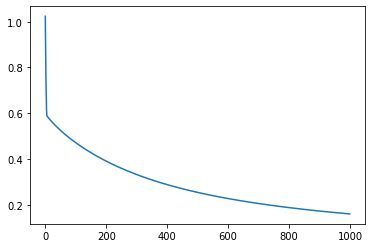

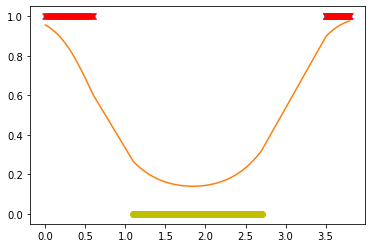

In [15]:
# take class 1 as '0' and other to '1'
# insert your code here
log_reg=logis_regression()
y2_mod = np.logical_or(y==0,y==2)
w2_pred,err=log_reg.Regression_grad_des(x_aug,y2_mod[:,np.newaxis],0.1)

plt.plot(err)
print(w2_pred)

# ploting
plt.figure()
plt.plot(x,y2_mod,'.')

y2_pred=log_reg.logis(x_aug,w2_pred)
plt.plot(x,y2_pred[:,0])
plot_op(x[:,np.newaxis],y2_pred)


[[ 3.83163745]
 [ 2.92737418]
 [-1.41034548]]


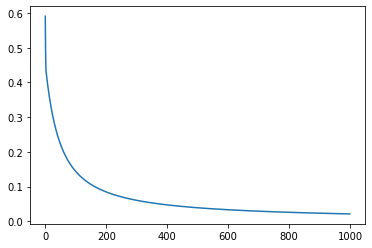

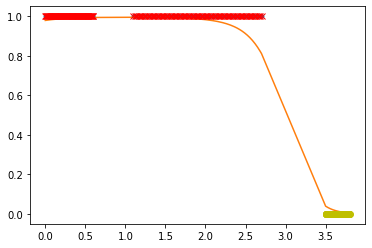

In [16]:
# take class 2 as '0' and other to '1'
# insert your code here
log_reg=logis_regression()
y3_mod = np.logical_or(y==0,y==1)
w3_pred,err=log_reg.Regression_grad_des(x_aug,y3_mod[:,np.newaxis],0.1)

plt.plot(err)
print(w3_pred)

# ploting
plt.figure()
plt.plot(x,y3_mod,'.')


y3_pred=log_reg.logis(x_aug,w3_pred)
plt.plot(x,y3_pred[:,0])

plot_op(x[:,np.newaxis],y3_pred)

(300,)


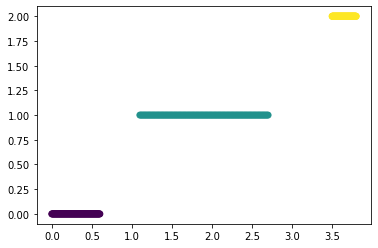

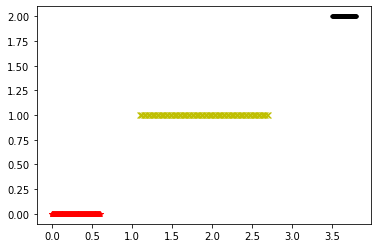

In [17]:
# final classification

# insert your code here  # as '0' is taken as referance
# insert your code here
Y=np.concatenate((y1_pred,y2_pred,y3_pred),axis=-1)
Y=np.argmin(Y,axis=1)
# because 0 classifies the class from all other classes i.e 0,1,1 means class 0
# 1,0,1 means class 1 and 1,1,0 means class 2
print(Y.shape)
plt.scatter(x,Y,c=Y)

plt.figure()
plt.plot(x1,np.zeros(x1.shape),'*',color='r')
plt.plot(x2,np.ones(x2.shape),'x',color='y')
plt.plot(x3,np.tile([2],x3.shape),'.',color='k')


In [18]:
def multiclass_log_regression(x_aug,y):
  log_reg=logis_regression()
  classes = int(max(y)+1)
  Y_mod = np.zeros((len(y),classes))
  Y_pred = np.zeros((len(y),classes))
  for c in range(classes):
    Y_mod[:,c]= y==c
    w_pred,err=log_reg.Regression_grad_des(x_aug,np.reshape(Y_mod[:,c],(len(y),1)),0.1)
    Y_pred[:,c]=np.ravel(log_reg.logis(x_aug,w_pred))
  Y=np.argmax(Y_pred,axis=1)
  return Y

(300,)


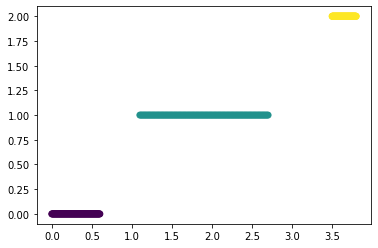

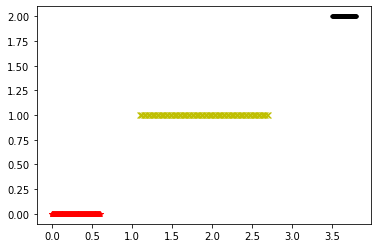

In [19]:
x_aug=data_transform(x[np.newaxis,:],2)
Y = multiclass_log_regression(x_aug,y)
print(Y.shape)
plt.scatter(x,Y,c=Y)

plt.figure()
plt.plot(x1,np.zeros(x1.shape),'*',color='r')
plt.plot(x2,np.ones(x2.shape),'x',color='y')
plt.plot(x3,np.tile([2],x3.shape),'.',color='k')
plt.show()